In [1]:
import pandas as pd

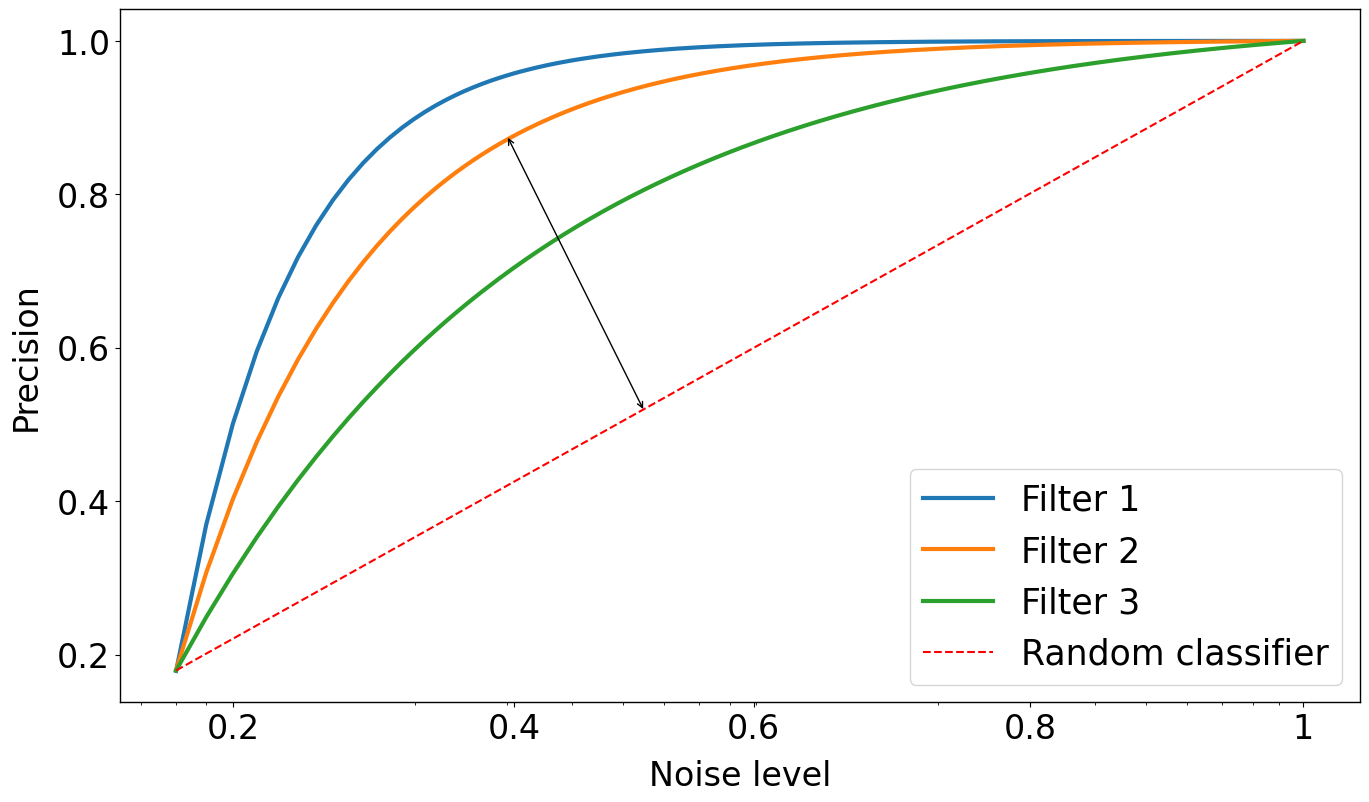

In [4]:
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def pl1(xData,yData,name):
    import numpy, scipy, matplotlib
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit

    def func(x, a, b, offset): # polytrope equation from zunzun.com
        return  a / numpy.power(x, b) + offset
    # these are the same as the scipy defaults
    initialParameters = numpy.array([1.0, 1.0, 1.0])
    # curve fit the test data
    fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
    modelPredictions = func(xData, *fittedParameters) 
    absError = modelPredictions - yData
    xModel = numpy.linspace(min(xData), max(xData), 1000)
    yModel = func(xModel, *fittedParameters)
    plt.plot(xModel/xModel.max(),yModel/yModel.max(),label=name,linewidth = 3)

    return xModel/xModel.max(),yModel/yModel.max()

s = 3
fig, ax = plt.subplots(figsize=(16,9))  

xData = np.array([7e-09, 9e-09, 1e-08, 2e-8, 1e-6])
yData = np.array([600.0, 900.0, 2500.0, 2500.0, 3100.0])
pl1(xData,yData,'Filter 1')

xData = np.array([7e-09, 9e-09, 1e-08, 2e-8, 1e-6])
yData = np.array([450.0, 800.0, 2200.0, 2000.0, 3100.0])
pl1(xData,yData,'Filter 2')

xData = np.array([7e-09, 9e-09, 1e-08, 2e-8, 1e-6])
yData = np.array([700.0, 900.0, 900.0, 2000.0, 3100.0])
a,b = pl1(xData,yData,'Filter 3')




ax.tick_params(axis='both' , labelsize=8*s)

ax.set_ylabel('Precision', fontsize = 8*s,labelpad=10)
ax.set_xlabel('Noise level',fontsize = 8*s,labelpad=10)


#ax.plot([0,0],[1,1],color = 'red', linestyle='dashed',label='Random classifier')

ax.plot([a.min(),a.max()],[b.min(),b.max()],color = 'red', linestyle='dashed',label='Random classifier')
#ax.plot(a.min(),1,'ob', linewidth=10, markersize=18,marker='*',color = 'black',label='Perfect classifier')

plt.xscale('log')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(fontsize = 8*s,prop={'size': 25})
start, end = ax.get_xlim()
ax.xaxis.set_ticks([])
plt.xticks([0.009,0.031,0.089,0.3,a.max()],[0.2,0.4,0.6,0.8,1])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
    
x = 0.03
y = 0.877
# 0.053, 0.62
ax.annotate('', xy=(x, y), xycoords='data',
   xytext=(x+0.025, y-0.36), textcoords='data',
             arrowprops=dict(facecolor='black',arrowstyle='<->'))
plt.savefig('../figuresNew/PONExample.jpeg', transparent=True,bbox_inches = 'tight', dpi = 300)
plt.show()

/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_137425/3684095314.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)


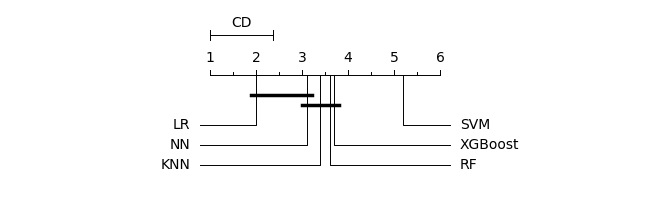

In [176]:
import Orange 
import matplotlib.pyplot as plt
import Orange

names = ["LR", "NN", "KNN", "RF","XGBoost", "SVM" ]
avranks =  [ 2.0, 3.1,3.4,3.6, 3.7, 5.2] 

#avranks =  [ 1.7, 2.1,3.6,3.7, 3.8, 4.4] 



cd = Orange.evaluation.compute_CD(avranks, 30,# len(names), 
                                 # alpha='0.05', 
                                 # test="bonferroni-dunn"
                                 )



ax_save = Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6.3
                              , textspace=2,  fontsize = 2, #ax = ax
                              #, cdmethod=4
                             )



name = '../figuresNew/CDExample_raw.jpeg'
plt.tight_layout(pad=0)

plt.savefig(name,transparent=True,bbox_inches = 'tight',
            #pad_inches=0,
            dpi = 300)





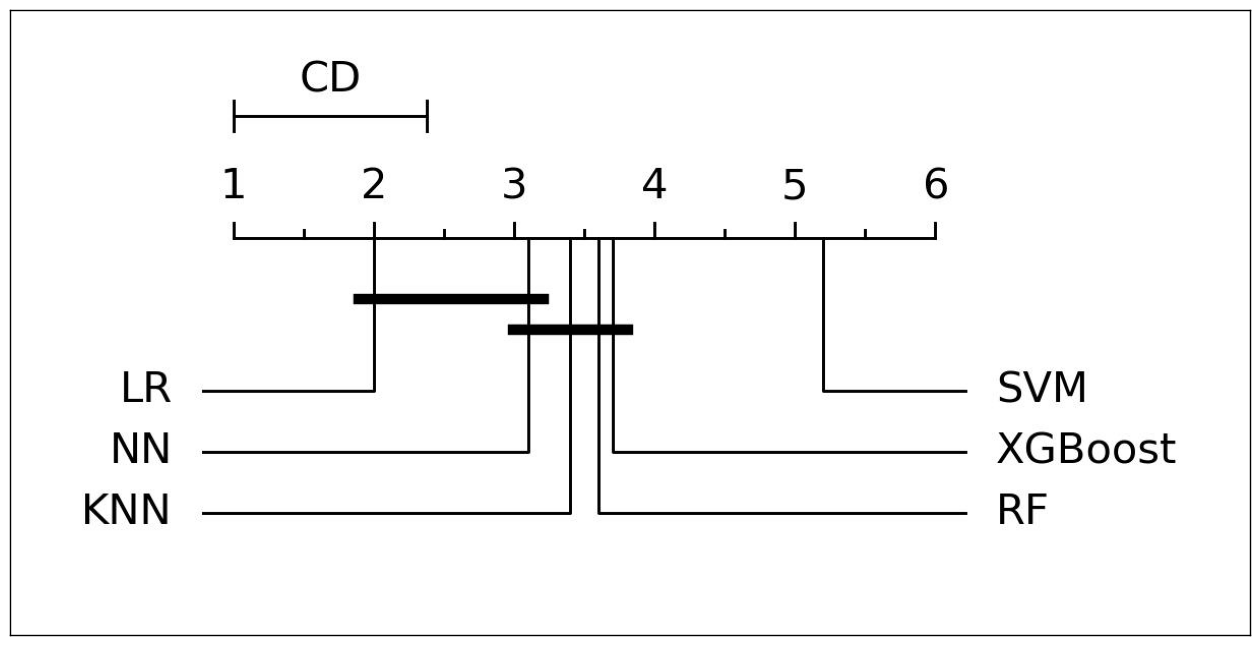

In [195]:
fig, ax = plt.subplots(1,1,figsize=(16,9))



image = plt.imread(name)
cropped_image = image[0:615,410:1630, :]

ax.imshow(cropped_image)

ax.xaxis.set_visible(False) # same for y axis.
ax.yaxis.set_visible(False) # same for y axis.

# ax.spines['bottom'].set_color('0')
# ax.spines['top'].set_color('0')
# ax.spines['right'].set_color('0')
# ax.spines['left'].set_color('0')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
#ax.set_xlabel('test',fontsize = 8*s,labelpad=10,color = 'white')

#plt.xticks([0.1,0.2],color = 'white')

#plt.yticks([])

#fig.tight_layout(pad=-47.0)
name_save = '../figuresNew/CDExample.jpeg'

plt.savefig(name_save,transparent=True,bbox_inches = 'tight',
            #pad_inches=0,
            dpi = 300)
